In [63]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [64]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]


In [65]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
X = df.iloc[0:100, [0, 2]].values

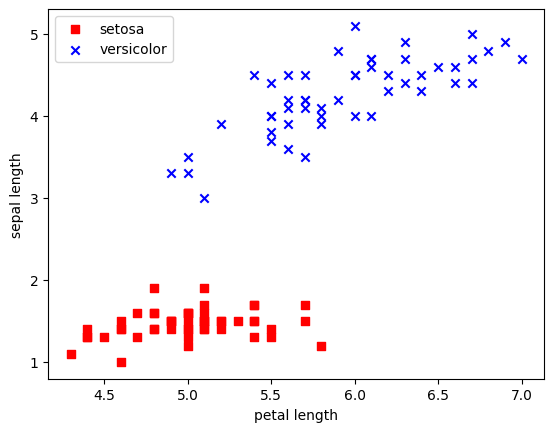

In [66]:
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="s", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.legend(loc="upper left")
plt.show()

In [67]:
execution = Perceptron(eta=0.01, n_iter=10)

In [68]:
execution.fit(X,y)

In [69]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    flower_names = {1: 'Iris-versicolor', -1: 'Iris-setosa'}  # Mapeamento de classe para nome da flor

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=flower_names[cl])  # Usar o mapeamento de classe para nome da flor

    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')

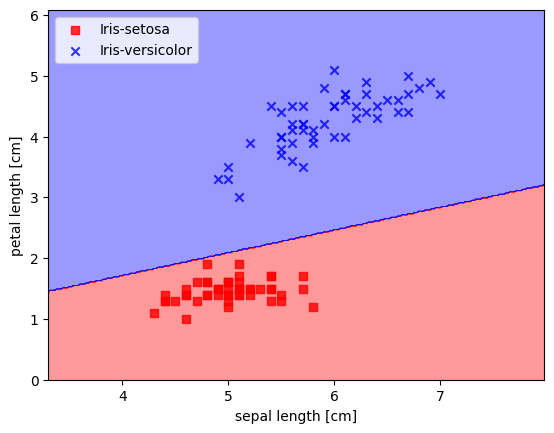

In [70]:
perceptron = Perceptron(eta=0.01, n_iter=10)
perceptron.fit(X, y)
plot_decision_regions(X, y, classifier=perceptron)
plt.show()
